# Linear Algebra
Although its name may sound harmless, Linear Algebra is by no means a trivial branch of mathematics, and the deeper you dive into Data Science and Statistics, the more often you will encounter its concepts.  In this exercise, we'll start with some basic operations on matrices and vectors, then move onto Eigenvalues and Eigenvectors, and conclude with some Matrix Decompositions.

## Vectors and Matrices
1 - Create a $2\times2$ matrix $\textbf{A}$ and a column vector $\vec{v}$.  Now compute the matrix products $\textbf{A}\vec{v}$ and $\vec{v}\textbf{A}$.  Did both operations work?  Why or why not?

In [2]:
import numpy as np

This works and is the correct product even if $v$ is not really a column vector:

In [3]:
A = np.array([[1, 2], [3, 4]])
v = np.array([5, 6])
A.dot(v)

array([17, 39])

This also works because $v$ is truly a row vector, so we have $1\times2$ times $2\times2$ and all is good:

In [4]:
v.dot(A)

array([23, 34])

2 - Using $\vec{v}$ above, compute the inner, or dot, product, $\vec{v} \cdot \vec{v}$.  Is this quantity reminiscent of another vector quantity?

In [5]:
v.dot(v)

61

This quantity is the same as the norm squared:

In [6]:
np.linalg.norm(v)**2

60.999999999999993

3 - Create 3 matrices $\textbf{A}$, $\textbf{B}$, $\textbf{C}$ of dimension $2\times2$, $3\times2$, and $2\times3$ respectively such that $$\textbf{A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \textbf{B} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6\end{bmatrix} \textbf{C} = \begin{bmatrix} 1 & 2 & 3\\ 4 & 5 & 6 \end{bmatrix}$$ and perform the following multiplications, stating the final dimensions of each: $\textbf{AA}$, $\textbf{AB}$, $\textbf{AC}$, $\textbf{BB}$, $\textbf{BA}$, $\textbf{BC}$, $\textbf{CC}$, $\textbf{CA}$, $\textbf{CB}$.  Comment on your results.

In [7]:
A = np.arange(1, 5).reshape(2, 2)
B = np.arange(1, 7).reshape(3, 2)
C = np.arange(1, 7).reshape(2, 3)

We can compute the product only if the number of columns of the first matrix is the same as the number of rows of the second:

In [7]:
for tab in [(x, y) for x in (A, B, C) for y in (A, B, C)]:
    try:
        if tab[0] is A:
            left = 'A'
        elif tab[0] is B:
            left = 'B'
        else:
            left = 'C'
        
        if tab[1] is A:
            right = 'A'
        elif tab[1] is B:
            right = 'B'
        else:
            right = 'C'
        
        print('{}{} =\n{}'.format(left, right, tab[0].dot(tab[1])))
        
    except ValueError as e:
        print('{}{} returns the error: {}'.format(left, right, e))

AA =
[[ 7 10]
 [15 22]]
AB returns the error: shapes (2,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)
AC =
[[ 9 12 15]
 [19 26 33]]
BA =
[[ 7 10]
 [15 22]
 [23 34]]
BB returns the error: shapes (3,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)
BC =
[[ 9 12 15]
 [19 26 33]
 [29 40 51]]
CA returns the error: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)
CB =
[[22 28]
 [49 64]]
CC returns the error: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)


4 - Using $\textbf{A}$ and $\textbf{B}$ above, compute $(\textbf{BA})^T$ and $\textbf{A}^T \textbf{B}^T$.  What can you say about your results?

The result is the same:

In [8]:
print((B.dot(A)).T)
print(A.T.dot(B.T))

[[ 7 15 23]
 [10 22 34]]
[[ 7 15 23]
 [10 22 34]]


5 - Using $\textbf{A}$, $\textbf{B}$, and $\textbf{C}$ above, compute the following sums: $\textbf{A+A}$, $\textbf{A+B}$, $\textbf{A+C}$, $\textbf{B+B}$, $\textbf{B+A}$, $\textbf{B+C}$, $\textbf{C+C}$, $\textbf{C+A}$, $\textbf{C+B}$.  Comment on your results.

We can only sum the matrices with themselves because they have to have the same dimension in order to be added (and because of their dimensions numpy can't broadcast them):

In [9]:
for tab in [(x, y) for x in (A, B, C) for y in (A, B, C)]:
    try:
        if tab[0] is A:
            left = 'A'
        elif tab[0] is B:
            left = 'B'
        else:
            left = 'C'
        
        if tab[1] is A:
            right = 'A'
        elif tab[1] is B:
            right = 'B'
        else:
            right = 'C'
        
        print('{}+{} =\n{}'.format(left, right, tab[0] + tab[1]))
        
    except ValueError as e:
        print('{}+{} returns the error: {}'.format(left, right, e))

A+A =
[[2 4]
 [6 8]]
A+B returns the error: operands could not be broadcast together with shapes (2,2) (3,2) 
A+C returns the error: operands could not be broadcast together with shapes (2,2) (2,3) 
B+A returns the error: operands could not be broadcast together with shapes (3,2) (2,2) 
B+B =
[[ 2  4]
 [ 6  8]
 [10 12]]
B+C returns the error: operands could not be broadcast together with shapes (3,2) (2,3) 
C+A returns the error: operands could not be broadcast together with shapes (2,3) (2,2) 
C+B returns the error: operands could not be broadcast together with shapes (2,3) (3,2) 
C+C =
[[ 2  4  6]
 [ 8 10 12]]


6 - Construct three matrices $\textbf{I}_A$, $\textbf{I}_B$, and $\textbf{I}_C$ such that $\textbf{I}_A\textbf{A} = \textbf{A}$, $\textbf{I}_B\textbf{B} = \textbf{B}$, and $\textbf{I}_C\textbf{C} = \textbf{C}$.

In [10]:
Ia = np.eye(2)
Ib = np.eye(3)
Ic = np.eye(2)

print(A)
print(Ia.dot(A))

print(B)
print(Ib.dot(B))

print(C)
print(Ic.dot(C))

[[1 2]
 [3 4]]
[[ 1.  2.]
 [ 3.  4.]]
[[1 2]
 [3 4]
 [5 6]]
[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]]
[[1 2 3]
 [4 5 6]]
[[ 1.  2.  3.]
 [ 4.  5.  6.]]


7 - Construct three matrices $\textbf{A}^{-1}$, $\textbf{B}^{-1}$, and $\textbf{C}^{-1}$ such that $\textbf{A}^{-1}\textbf{A} = \textbf{I}_A$, $\textbf{B}^{-1}\textbf{B} = \textbf{I}_B$, and $\textbf{C}^{-1}\textbf{C} = \textbf{I}_C$.  Comment on your results. **Hint** This may not always be possible!

In [9]:
Ainv = np.linalg.inv(A)
print(A)
print(Ainv.dot(A))

print(B)
print('Not possible because B is 3x2 and Ib is 3x3')

print(C)
print('Not possible because C is 2x3 and Ib is 2x2')

[[1 2]
 [3 4]]
[[  1.00000000e+00   4.44089210e-16]
 [  0.00000000e+00   1.00000000e+00]]
[[1 2]
 [3 4]
 [5 6]]
Not possible because B is 3x2 and Ib is 3x3
[[1 2 3]
 [4 5 6]]
Not possible because C is 2x3 and Ib is 2x2


8 - Using $\textbf{A}^{-1}$ compute $(\textbf{A}^{-1})^T$ and comment on your results.

$(A^{-1})^{T}$ is the same as $(A^T)^{-1}$:

In [10]:
print(Ainv.T)
print(np.linalg.inv(A.T))

print(np.linalg.inv(Ainv.T))

[[-2.   1.5]
 [ 1.  -0.5]]
[[-2.   1.5]
 [ 1.  -0.5]]
[[ 1.  3.]
 [ 2.  4.]]


9 - Using $\textbf{A}$, $\textbf{B}$, and $\textbf{C}$, compute the determinant of each.  Comment on your results.

In [13]:
print(np.linalg.det(A))
# print(np.linalg.det(B))
# print(np.linalg.det(C))

-2.0


We can't compute the determinant for $B$ and $C$ since they are not square matrices.

10 - Construct a square ($2\times2$) matrix, $\textbf{D}$,that is not invertible.

In [14]:
D = np.array([[0, 0], [0, 0]])

11 - How would you go about solving the equation $\textbf{A}\vec{x} = 0$, using $\textbf{A}$ as above for an unknown $\vec{x}$?  Do so and comment on your results.  **Hint** consider parts (6) and (7).

In [15]:
c = np.array([0, 0])
x = Ainv.dot(c)
x

array([ 0.,  0.])

12 - Using the same method as in part (11), solve the equation $\textbf{A}\vec{x} = \vec{y}$ where $\vec{y} = \begin{bmatrix} 1 \\ -1 \end{bmatrix}$

In [16]:
y = np.array([1, -1])
x = Ainv.dot(y)
x

array([-3.,  2.])

13 - Solve the system of equations $$x_0 + 2x_1 = 3$$ $$-x_0 + x_1 = 1$$ using both matrix inversion and built in numpy functions.

In [17]:
A = np.array([[1, 2], [-1, 1]])
b = np.array([3, 1])

In [18]:
# Using inversion
x = np.linalg.inv(A).dot(b)
x

array([ 0.33333333,  1.33333333])

In [19]:
# Using linalg.solve
x = np.linalg.solve(A, b)
x

array([ 0.33333333,  1.33333333])

14 - Solve the system of equations $$x_0 + x_1 = 1$$ $$2x_0 + 2x_1 = 2$$ $$-3x_0 + -3x_1 = -3$$ using both matrix inversion and built in numpy functions.  Are these results what you expected?  Comment on your results.

The three equations are the same, so there are infinite solutions and I expect that numpy can't solve it; instead the error returned in both cases essentially says that the number of equations is different from the number of unknowns:

In [20]:
A = np.array([[1, 1], [2, 2], [-3, -3]])
b = np.array([1, 2, -3])

In [21]:
# Using inversion
x = np.linalg.inv(A).dot(b)
x

LinAlgError: Last 2 dimensions of the array must be square

In [22]:
# Using linalg.solve
x = np.linalg.solve(A, b)
x

LinAlgError: Last 2 dimensions of the array must be square

15 - Solve the system of equations $$x_0 + x_1 = 0$$ $$x_0 + x_1 = 1$$ using both matrix inversion and built in numpy functions.  Are these results what you expected?  Comment on your results.

The system has no solution and, using both methods, I get something similar to what I expected: the error says that the matrix is singular so it can't be inverted:

In [23]:
A = np.array([[1, 1], [1, 1]])
b = np.array([0, 1])

In [24]:
# Using inversion
x = np.linalg.inv(A).dot(b)
x

LinAlgError: Singular matrix

In [25]:
# Using linalg.solve
x = np.linalg.solve(A, b)
x

LinAlgError: Singular matrix

## Eigenvalues and Eigenvectors
No discussion of Linear Algebra would be complete without taking a look at Eigenvalues and Eigenvectors.  The root word "eigen" comes from the German meaning "characteristic", and these values and associated vectors, represent some interesting properties of a given matrix.  Namely, for a given matrix $\textbf{A}$ and vector $\vec{v}$, the eigenvalue(s), $\lambda$, of $\textbf{A}$, are the $\lambda$ that satisfy the relationship $$\textbf{A} \vec{v} = \lambda \vec{v}$$ Keep in mind that $\lambda$ is a *scalar* quantity, and when you multiply a vector by a scalar quantity, you just scale, or stretch, the vector in space.  Therefore, the above relationship says that the eigenvalues $\lambda$ of $\textbf{A}$, and associated eigenvectors $\vec{v}$, are the vectors that when multiplied by $\textbf{A}$ just "stretch" in space (no rotations).

Now that may not sound very special, but the applicability of these concepts cannot be understated.  Eigenvalues and vectors have a tendency to crop up in any mathematically grounded discipline and Data Science is no exception.

For a more detailed explanation, see 
- [Great math formula explanation](http://www.visiondummy.com/2014/03/eigenvalues-eigenvectors/)
- [Visual explanation of Eigenvectors and Eigenvalues](http://setosa.io/ev/eigenvectors-and-eigenvalues/)

before proceding with the following exercises.

1 - Generate a matrix $$\textbf{A} = \begin{bmatrix} 0 & 1 \\ -2 & -3 \end{bmatrix}$$ and two vectors of your choosing, labeled $\vec{v}_1$ and $\vec{v}_2$.  Then compute the vectors $$\vec{v}_1' = \textbf{A}\vec{v}_1$$ $$\vec{v}_2' = \textbf{A}\vec{v}_2$$ And plot all 4 vectors with appropriate labels.  Comment on your results.

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
A = np.array([[0, 1], [-2, 3]])
v1 = np.array([1, 0])
v2 = np.array([-1, 1])
v1a = A.dot(v1)
v2a = A.dot(v2)

In [13]:
# This is the plotting function from the instructional notebook:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

Applying the transformation $A$ causes the vector to be rotated and scaled:

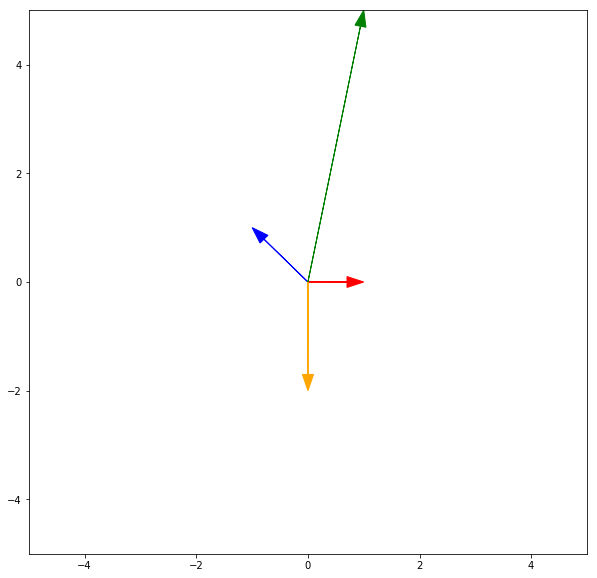

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
plot_vector2d(v1, color='red', label='v1')
plot_vector2d(v2, color='blue', label='v2')
plot_vector2d(v1a, color='orange', label='v1a')
plot_vector2d(v2a, color='green', label='v2a');
#ax.legend();

2 - Now compute the eigenvalues and eigenvectors of $\textbf{A}$, then plot $\textbf{A}\vec{v}$ and $\lambda\vec{v}$ on seperate plots, where $\lambda$ is the eigenvalue of $\textbf{A}$.  Comment on your results.

In [18]:
val, vec = np.linalg.eig(A)
print(val)
print(vec)

[ 1.  2.]
[[-0.70710678 -0.4472136 ]
 [-0.70710678 -0.89442719]]


In [19]:
print(A.dot(vec[:,0]))
print(val[0]*vec[:,0])

[-0.70710678 -0.70710678]
[-0.70710678 -0.70710678]


The eigenvectors are mapped to themselves by $A$, since this is their defining property:

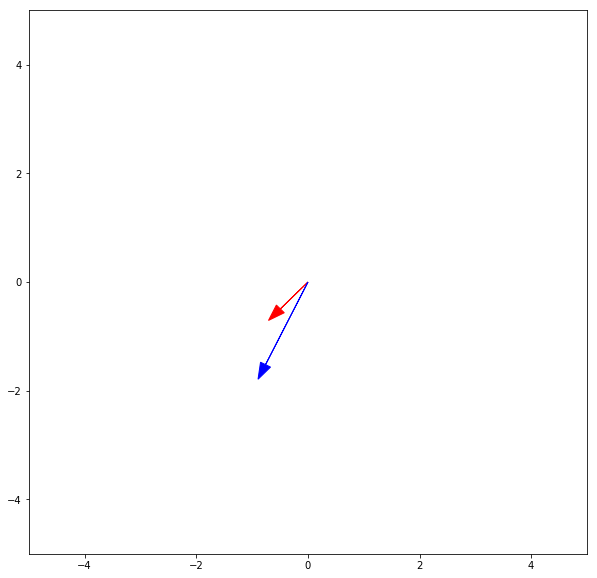

In [20]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
plot_vector2d(A.dot(vec[:, 0]), color='red', label='eig1')
plot_vector2d(A.dot(vec[:, 1]), color='blue', label='eig2');
#ax.legend();

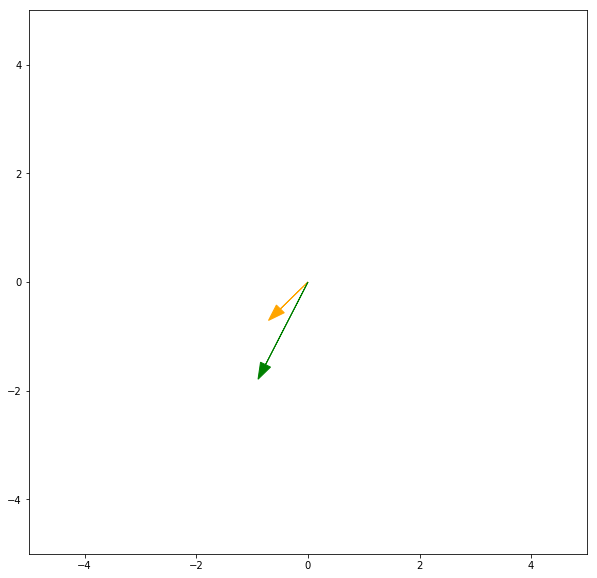

In [21]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
plot_vector2d(val[0]*vec[:, 0], color='orange', label='lambda1')
plot_vector2d(val[1]*vec[:, 1], color='green', label='lambda2');
#ax.legend();

3 - How do the results of part (2) differ from part (1)?

The vectors in part (1) are rotated by $A$ while the eigenvectors of part (2) are just scaled by the transformation.

4 - Define a new 3x3 matrix of the form $$\textbf{A} = \begin{bmatrix} -2 & -4 & 2 \\ -2 & 1 & 2 \\ 4 & 2 & 5 \end{bmatrix}$$ and compute the eigenvalues and vectors.  What can you say about the number of eigenvectors in your results?

Since the matrix has rank 3 we get three eigenvectors as expected:

In [35]:
A = np.array([[-2, -4, 2], [-2, 1, 2], [4, 2, 5]])
np.linalg.eig(A)

(array([-5.,  3.,  6.]), array([[ 0.81649658,  0.53452248,  0.05842062],
        [ 0.40824829, -0.80178373,  0.35052374],
        [-0.40824829, -0.26726124,  0.93472998]]))

5 - Define a new 3x3 matrix of the form $$\textbf{B} = \begin{bmatrix} -2 & -4 & 2 \\ -2 & 1 & 2 \\ 1 & 2 & -1 \end{bmatrix}$$ and compute the eigenvalues and vectors.  What can you say about the eigenvalues in your results?  Do they differ from what you saw in part (4)?

The matrix has rank 2 (the third column is equal to the first times $-1$), so I expect two eigenvectors; the fact that we get three is due to float arithmetic precision: the second eigenvalue is almost 0.

In [36]:
B = np.array([[-2, -4, 2], [-2, 1, 2], [1, 2, -1]])
np.linalg.eig(B)

(array([ -5.00000000e+00,  -1.11455983e-16,   3.00000000e+00]),
 array([[  8.16496581e-01,   7.07106781e-01,  -5.34522484e-01],
        [  4.08248290e-01,  -2.65739405e-17,   8.01783726e-01],
        [ -4.08248290e-01,   7.07106781e-01,   2.67261242e-01]]))

6 - Compute the inverse of $\textbf{A}$ and $\textbf{B}$ above.  Comment on your results.

We can't invert the matrix $B$ because it has two proportional columns:

In [37]:
np.linalg.inv(A)

array([[-0.01111111, -0.26666667,  0.11111111],
       [-0.2       ,  0.2       ,  0.        ],
       [ 0.08888889,  0.13333333,  0.11111111]])

In [38]:
np.linalg.inv(B)

LinAlgError: Singular matrix

7 - Compute the determinant of $\textbf{A}$ and $\textbf{B}$.  How might your results relate to the eigen values you computed above?

The matrix $B$ is not invertibile because it has determinant equal to 0; this means that it projects the arrays in the space on a single plane: this has dimension 2 so we can only have two eigenvectors.

In [39]:
print(np.linalg.det(A))
print(np.linalg.det(B))

-90.0
0.0


8 - Consider the rotation matrix $$\textbf{R} = \begin{bmatrix} cos(\theta) & sin(\theta) \\ -sin(\theta) & cos(\theta)\end{bmatrix}$$.  Using a value of $\theta = 90$, compute the inner product of the columns, $\textbf{R}^T$, $\textbf{R}^{-1}$, $det(\textbf{R})$, and the eigenvalues and eigenvectors.  Comment on your results.

A rotation matrix is unitary, so it has determinant equal to 1 and $R^T = R^{-1}$.

In [23]:
t = np.pi/2
R = np.array([[np.cos(t), np.sin(t)], [-np.sin(t), np.cos(t)]])

print(R.T)
print(np.linalg.inv(R))
print(np.linalg.det(R))

[[  6.12323400e-17  -1.00000000e+00]
 [  1.00000000e+00   6.12323400e-17]]
[[  6.12323400e-17  -1.00000000e+00]
 [  1.00000000e+00   6.12323400e-17]]
1.0


Eigenvalues and eigenvectors are complex numbers because a rotation has no fixed directions:

In [25]:
np.linalg.eig(R)

(array([  6.12323400e-17+1.j,   6.12323400e-17-1.j]),
 array([[ 0.70710678+0.j        ,  0.70710678-0.j        ],
        [ 0.00000000+0.70710678j,  0.00000000-0.70710678j]]))

## Matrix Decomposition
Matrix Decomposition can be thought of as rewriting a given matrix as a product of other (and often simpler) matrices.  For example, given a matrix $\textbf{A}$, one can decompose $\textbf{A}$ into the following. $$\textbf{A} = \textbf{Q} \Lambda \textbf{Q}^{-1}$$
where $\textbf{Q}$ is a matrix whose *$i^{th}$* column is the *$i^{th}$* eigenvector of $\textbf{A}$, and $\Lambda$ is a matrix containing all of the corresponding eigenvalues on the main diagonal.  Decomposing $\textbf{A}$ in this manner is called an Eigendecomposition.  Such matrix decompositions, form the basis of many techniques in Data Science and other mathematical disciplines.

1 - Compute the eigenvalues and eigenvectors of matrix $$\textbf{A} = \begin{bmatrix} -2 & -4 & 2 \\ -2 & 1 & 2 \\ 4 & 2 & 5 \end{bmatrix}$$

In [41]:
A = np.array([[-2, -4, 2], [-2, 1, 2], [4, 2, 5]])
val, vec = np.linalg.eig(A)

2 - Construct a matrix $\textbf{Q}$ whose columns are the eigenvectors of $\textbf{A}$.

In [42]:
Q = vec

3 - Construct a set of three vectors $\vec{\lambda_1} \dots \vec{\lambda_n}$, whose *$n^{th}$* element is the *$n^{th}$* eigenvalue of $\textbf{A}$ while all other elements are 0.  The second vector, for example, would be $$\vec{\lambda_2} = \begin{bmatrix} 0 \\ \lambda_2 \\ 0 \end{bmatrix}$$

In [43]:
l = np.diag(val)

4 - Now try multiplying various combinations of $\textbf{A}$, $\textbf{Q}$, and $\vec{\lambda_n}$ together.  What is the relationship among them?

Each $\lambda_i$ multiplied by $Q$ gives one of the columns of $A \cdot Q$:

In [44]:
print(l[0] * Q)
print(l[1] * Q)
print(l[2] * Q)
print(A.dot(Q))

[[-4.0824829   0.          0.        ]
 [-2.04124145 -0.          0.        ]
 [ 2.04124145 -0.          0.        ]]
[[ 0.          1.60356745  0.        ]
 [ 0.         -2.40535118  0.        ]
 [-0.         -0.80178373  0.        ]]
[[ 0.          0.          0.35052374]
 [ 0.         -0.          2.10314246]
 [-0.         -0.          5.60837988]]
[[-4.0824829   1.60356745  0.35052374]
 [-2.04124145 -2.40535118  2.10314246]
 [ 2.04124145 -0.80178373  5.60837988]]


5 - Solve the relationship you found in part (4) for $\textbf{A}$ and verify that this is the eigenvalue decomposition.

In [45]:
print(Q.dot(l).dot(np.linalg.inv(Q)))
print(A)

[[-2. -4.  2.]
 [-2.  1.  2.]
 [ 4.  2.  5.]]
[[-2 -4  2]
 [-2  1  2]
 [ 4  2  5]]


6 - Another very useful matrix decomposition is the Singular Value Decomposition (SVD) which is used, for example, in Principal Component Analysis.  A full discussion of this decomposition is beyond the scope of this exercise, but singular values are the square roots of the eigenvalues of $\textbf{A}\textbf{A}^T$ (for the real case).  Using numpy, perform a SVD on $\textbf{A}$ used above, and verify that the values on the main diagonal of the singular matrix are the square roots of the eigenvalues of $\textbf{A}$.

In [46]:
u, diag, v = np.linalg.svd(A)

In [47]:
eigenval, eigenvec = np.linalg.eig(A.dot(A.T))

In [48]:
print(diag**2)
print(eigenval)

[ 46.81226975  23.96865293   7.21907732]
[ 46.81226975  23.96865293   7.21907732]


In [49]:
print(u.dot(np.diag(diag)).dot(v))
print(A)

[[-2. -4.  2.]
 [-2.  1.  2.]
 [ 4.  2.  5.]]
[[-2 -4  2]
 [-2  1  2]
 [ 4  2  5]]
